In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path


In [16]:
file_path = Path("Resources/car_df.csv")

car_df = pd.read_csv(file_path)

car_df.dropna()

,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00000,6758.666667,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00000,6058.000000,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00000,4815.000000,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33333,5883.000000,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.66667,5582.666667,135.028,742.02088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-04-01,1982667,141600.0000,12.41471,14.75663,38044.46,24997.55,4.98,14.08,97307.00000,14794.666670,170.626,1445.19726
57,2022-07-01,1996667,149000.0000,9.96116,7.04461,40155.68,25401.15,5.47,14.38,94596.33333,14288.000000,173.732,1476.90938
58,2022-10-01,2144333,141666.6667,7.14219,-3.35331,39407.02,24908.59,6.07,14.78,92916.33333,12121.666670,176.870,1499.48983
59,2023-01-01,2149000,147400.0000,5.91060,-12.12838,39066.36,23537.12,6.41,15.70,93448.00000,14638.000000,178.662,1516.36253


In [17]:
# Round 'Car Retail Sales (New)' and 'Car Retail Sales (Used)' columns to two decimal places
car_df["Car Retail Sales (New)"] = car_df["Car Retail Sales (New)"].round(2)
car_df["Car Retail Sales (Used)"] = car_df["Car Retail Sales (Used)"].round(2)
car_df.head()


,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00,6758.67,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00,6058.00,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00,4815.00,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33,5883.00,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.67,5582.67,135.028,742.02088


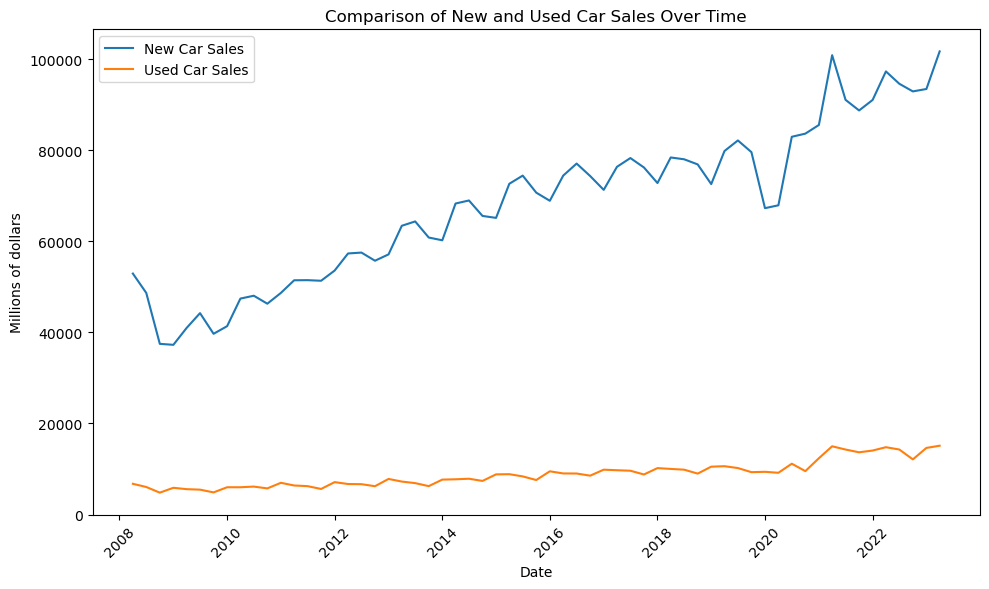

In [18]:
car_df["observation_date"] = pd.to_datetime(car_df["observation_date"])

# Plotting the line plot for used and new car sales over time
plt.figure(figsize=(10, 6)) 

plt.plot(car_df["observation_date"], car_df["Car Retail Sales (New)"], label="New Car Sales")
plt.plot(car_df["observation_date"], car_df["Car Retail Sales (Used)"], label="Used Car Sales")

plt.title("Comparison of New and Used Car Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Millions of dollars")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Filter the data for the first DataFrame (dates from 2008 to 2019)
df_precovid = car_df[(car_df["observation_date"].dt.year >= 2008) & (car_df["observation_date"].dt.year <= 2019)]
df_precovid = df_precovid[["observation_date", "Car Retail Sales (New)", "Car Retail Sales (Used)", "Average Finance Rate (New)", "Average Finance Rate (Used)"]]
df_precovid.head()


,observation_date,Car Retail Sales (New),Car Retail Sales (Used),Average Finance Rate (New),Average Finance Rate (Used)
0,2008-04-01,52920.00,6758.67,5.74,10.63
1,2008-07-01,48668.00,6058.00,5.56,10.62
2,2008-10-01,37487.00,4815.00,5.62,10.33
3,2009-01-01,37274.33,5883.00,5.71,10.37
4,2009-04-01,40983.67,5582.67,4.71,10.06


In [20]:
# Filter the data for the second DataFrame (dates from 2020 onwards)
df_postcovid = car_df[car_df["observation_date"].dt.year >= 2020]
df_postcovid = df_postcovid[["observation_date", "Car Retail Sales (New)", "Car Retail Sales (Used)", "Average Finance Rate (New)", "Average Finance Rate (Used)"]]
df_postcovid.head()


,observation_date,Car Retail Sales (New),Car Retail Sales (Used),Average Finance Rate (New),Average Finance Rate (Used)
47,2020-01-01,67281.67,9392.33,6.13,14.31
48,2020-04-01,67910.67,9176.67,4.80,14.23
49,2020-07-01,82953.00,11170.00,4.98,12.69
50,2020-10-01,83644.33,9542.67,5.07,12.99
51,2021-01-01,85548.00,12376.00,4.79,13.58


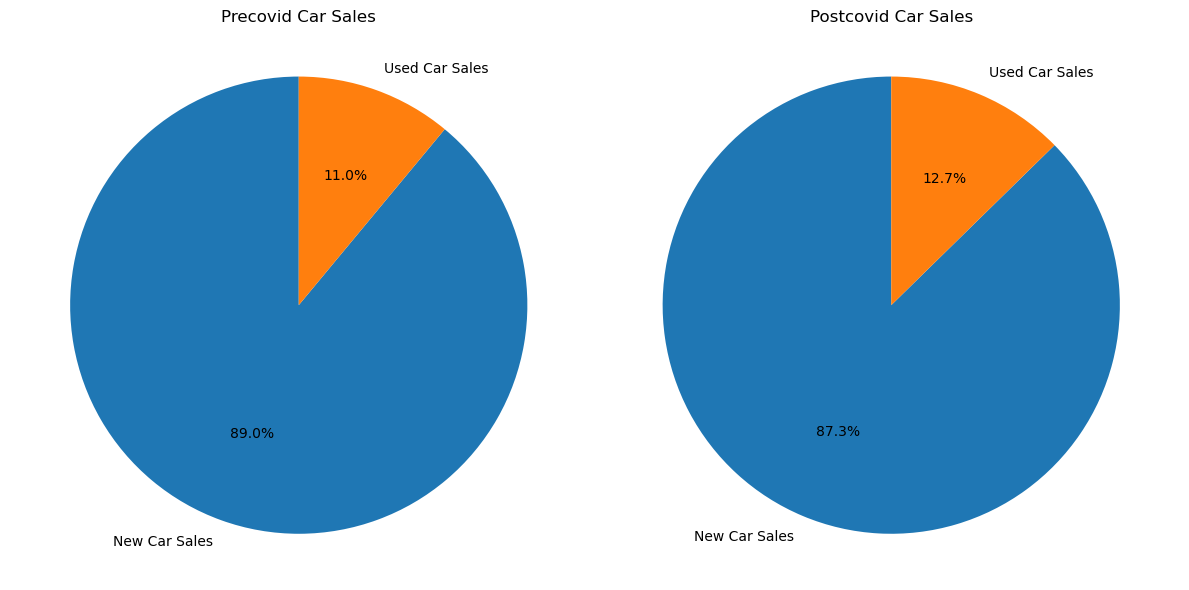

In [21]:
# Calculate the total sales for new and used cars for precovid period
total_new_precovid = df_precovid["Car Retail Sales (New)"].sum()
total_used_precovid = df_precovid["Car Retail Sales (Used)"].sum()

# Data for pie chart
labels_precovid = "New Car Sales", "Used Car Sales"
sizes_precovid = [total_new_precovid, total_used_precovid]

# Pie chart for precovid sales
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(sizes_precovid, labels=labels_precovid, autopct='%1.1f%%', startangle=90)
axs[0].axis("equal")
axs[0].set_title("Precovid Car Sales")

# Calculate the total sales for new and used cars for postcovid period
total_new_postcovid = df_postcovid["Car Retail Sales (New)"].sum()
total_used_postcovid = df_postcovid["Car Retail Sales (Used)"].sum()

# Data for pie chart
labels_postcovid = 'New Car Sales', 'Used Car Sales'
sizes_postcovid = [total_new_postcovid, total_used_postcovid]

# Pie chart for postcovid sales
axs[1].pie(sizes_postcovid, labels=labels_postcovid, autopct='%1.1f%%', startangle=90)
axs[1].axis("equal") 
axs[1].set_title("Postcovid Car Sales")

plt.tight_layout()
plt.show()

Precovid Period (2008-2019):

- New Car Sales: Showed a consistent trend over the years with a predominant market share compared to used cars.
- Used Car Sales: Also exhibited steady sales but consistently lower than new car sales.
- The pie chart illustrated that the majority of car sales during this period were attributed to new cars.

Postcovid Period (2020-Onwards):

- New Car Sales: Saw fluctuations, possibly due to the impact of the pandemic on the automotive market, resulting in varying sales volumes.
- Used Car Sales: Displayed a fluctuating pattern as well, potentially influenced by market shifts and changing consumer preferences during and after the pandemic.
- The pie chart might indicate shifts in consumer behavior or market dynamics.

The scatter plot and regression line suggest a moderate positive linear relationship between rate and sales. A low p-value suggests that the relationship is statistically significant. A correlation coefficient of 0.3256 indicates a moderately positive linear relationship between the two variables.


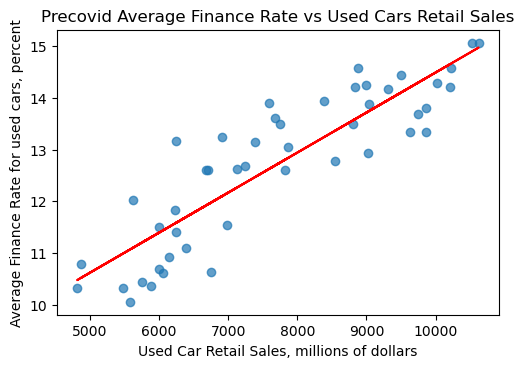

P-value: 0.0000
Correlation: 0.8796


In [22]:
y = df_precovid["Average Finance Rate (Used)"]
x = df_precovid["Car Retail Sales (Used)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Used Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for used cars, percent")
plt.title("Precovid Average Finance Rate vs Used Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_precovid["Average Finance Rate (Used)"].corr(df_precovid["Car Retail Sales (Used)"])
print(f"Correlation: {correlation:.4f}")

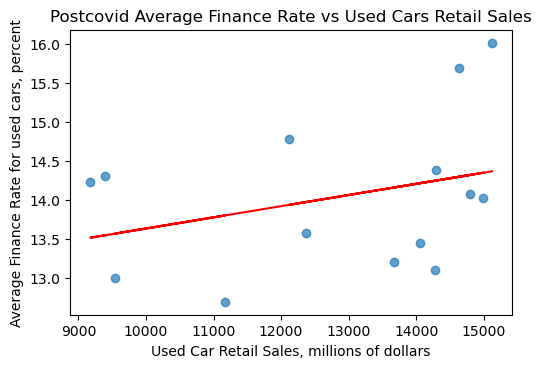

P-value: 0.2616
Correlation: 0.3220


In [23]:
y = df_postcovid["Average Finance Rate (Used)"]
x = df_postcovid["Car Retail Sales (Used)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Used Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for used cars, percent")
plt.title("Postcovid Average Finance Rate vs Used Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_postcovid["Average Finance Rate (Used)"].corr(df_postcovid["Car Retail Sales (Used)"])
print(f"Correlation: {correlation:.4f}")

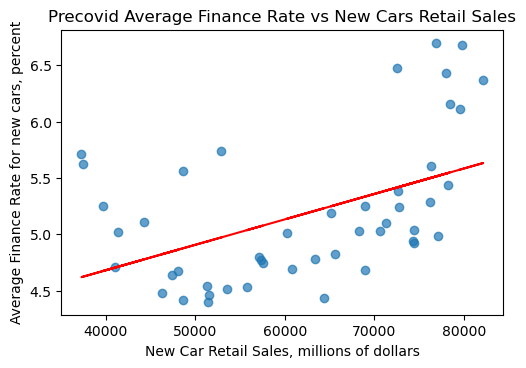

P-value: 0.0007
Correlation: 0.4760


In [24]:
y = df_precovid["Average Finance Rate (New)"]
x = df_precovid["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for new cars, percent")
plt.title("Precovid Average Finance Rate vs New Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_precovid["Average Finance Rate (New)"].corr(df_precovid["Car Retail Sales (New)"])
print(f"Correlation: {correlation:.4f}")

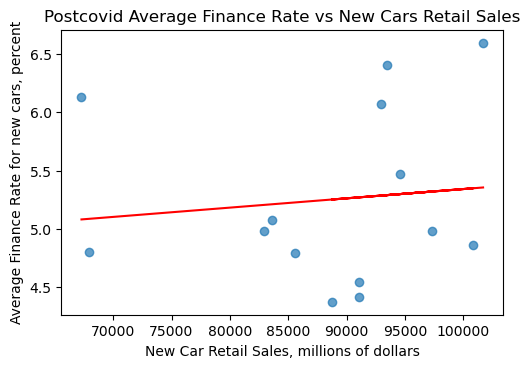

P-value: 0.7046
Correlation: 0.1114


In [25]:
y = df_postcovid["Average Finance Rate (New)"]
x = df_postcovid["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for new cars, percent")
plt.title("Postcovid Average Finance Rate vs New Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_postcovid["Average Finance Rate (New)"].corr(df_postcovid["Car Retail Sales (New)"])
print(f"Correlation: {correlation:.4f}")